In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
custom_stopwords=stopwords.words('english')
# custom_stopwords.extend(['said','-','like','many','told','can','could','would','should','a','want','will','about', 'actually', 'almost', 'also', 'although', 'always', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'became', 'become', 'but', 'by', 'can', 'could', 'did', 'do', 'does', 'each', 'either', 'else', 'for', 'from', 'had', 'has', 'have', 'hence', 'how', 'i', 'if', 'in', 'is', 'it', 'its', 'just', 'maybe', 'me', 'might', 'mine', 'must', 'my', 'mine', 'must', 'my', 'neither', 'nor', 'not', 'of', 'oh', 'ok', 'when', 'where', 'whereas', 'wherever', 'whenever', 'whether', 'which', 'while', 'who', 'whom', 'whoever', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yes', 'yet', 'you', 'your'])

custom_stopwords.extend(['said','also','need','the','year','take','took','got','years','day','days','used','use','month','mr','mrs','ms','since','hence','henceforth','months','say','says','get','time','come','much','know','u','-','like','many','told','can','could','would','should','a','want','will','about', 'actually', 'almost', 'also', 'although', 'always', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'became', 'become', 'but', 'by', 'can', 'could', 'did', 'do', 'does', 'each', 'either', 'else', 'for', 'from', 'had', 'has', 'have', 'hence', 'how', 'i', 'if', 'in', 'is', 'it', 'its', 'just', 'may', 'maybe', 'me', 'might', 'mine', 'must', 'my', 'mine', 'must', 'my', 'neither', 'nor', 'not', 'of', 'oh', 'ok', 'when', 'where', 'whereas', 'wherever', 'whenever', 'whether', 'which', 'while', 'who', 'whom', 'whoever', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yes', 'yet', 'you', 'your'])

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [2]:
# Load CSV file into DataFrame
df = pd.read_csv('output-merged.csv')
df.head(20)

,Title,Content,Number of Words,Category,Date Published,Link
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...,270,economy,2023-04-25,https://www.cnn.com/2023/04/25/economy/april-u...
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...,474,business,2023-04-25,https://www.cnn.com/2023/04/25/business/gm-ear...
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu...",673,business,2023-04-25,https://www.cnn.com/2023/04/25/business/chevro...
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the...",395,homes,2023-04-25,https://www.cnn.com/2023/04/25/homes/new-home-...
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex...",1529,media,2023-04-24,https://www.cnn.com/2023/04/24/media/tucker-ca...
5,\n US home prices rose slightly in Februa...,"US home prices rose slightly in February, snap...",491,homes,2023-04-25,https://www.cnn.com/2023/04/25/homes/case-shil...
6,\n Mattel introduces first Barbie doll re...,Mattel on Tuesday introduced its first-ever ve...,604,business,2023-04-25,https://www.cnn.com/2023/04/25/business/barbie...
7,\n Fox News’ sudden firing of Tucker Carl...,Why? That is the question I have been asked — ...,790,media,2023-04-25,https://www.cnn.com/2023/04/25/media/fox-news-...
8,\n US woman arrested in Sydney after airp...,An American woman has been arrested in Sydney ...,368,australia,2023-04-25,https://www.cnn.com/2023/04/25/australia/austr...
9,\n Report: 5 of 6 suspects in Alabama Swe...,Five of six suspects arrested in connection wi...,378,us,2023-04-25,https://www.cnn.com/2023/04/25/us/dadeville-al...


In [3]:
df.shape
text = df[['Title', 'Content', 'Number of Words', 'Category','Link']]
text.head()

,Title,Content,Number of Words,Category,Link
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...,270,economy,https://www.cnn.com/2023/04/25/economy/april-u...
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...,474,business,https://www.cnn.com/2023/04/25/business/gm-ear...
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu...",673,business,https://www.cnn.com/2023/04/25/business/chevro...
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the...",395,homes,https://www.cnn.com/2023/04/25/homes/new-home-...
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex...",1529,media,https://www.cnn.com/2023/04/24/media/tucker-ca...


In [4]:
df = df[['Title', 'Content', 'Number of Words']]
df

,Title,Content,Number of Words
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...,270
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...,474
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu...",673
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the...",395
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex...",1529
...,...,...,...
1180,Hospitals and health care facilities should dr...,Walensky told Congress that masking guidance ‘...,1499
1181,ChatGPT for health care providers: Can the AI ...,"OpenAI CEO Sam Altman said that he was ""a litt...",1554
1182,Want to get better sleep? Exercise for this lo...,Get the rest you need with these simple tweaks...,553
1183,Massachusetts town says Avian Flu detected amo...,Fox News Flash top headlines are here. Check o...,324


## GROUPING CATEGORIES

In [5]:
sport_categories = ["football", "tennis", "sport", "motorsport", "golf","cricket","hockey"]
country_categories =["us","uk","europe","australia","americas","africa","asia","china","india","middleeast","weather"]
tech=["tech","technology"]
celeb=["media","celebrities","entertainment"]
business=["business","Business","homes","success","cars"]
health=["health","disability","newsbeat"]
edu=["education","explainers"]
pol=["politics","opinions"]
travel=["NaN"]
science=["science"]
money=["economy","investing"]

# Define a dictionary to map original category values to subcategory values
subcategories_dict = {"science":"science","NaN":"travel","education":"education","explainers":"explainers","cricket":"cricket","tech":"tech","technology":"technology","business":"business","Business":"Business","health":"health","disability":"disability","newsbeat":"newsbeat","football": "football", "tennis": "tennis", "sport": "sport", "motorsport": "motorsport", "golf": "golf","us":"us","uk":"uk","europe":"europe","australia":"australia","americas":"americas","africa":"africa","asia":"asia","china":"china","india":"india","middleeast":"middleast","hockey":"hockey","cricket":"cricket","economy":"economy","investing":"investing","homes":"homes","opinions":"opinions","politics":"politics","success":"success","cars":"cars","science":"science","weather":"weather"}
#print(df['Category'])
# Update the "Category" column and create a new "SubCategory" column
text.loc[text['Category'].isin(sport_categories), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(sport_categories), 'Category'] = 'SPORTS'
text.loc[text['Category'].isin(country_categories), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(country_categories), 'Category'] = 'WORLD NEWS'
text.loc[text['Category'].isin(tech), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(tech), 'Category'] = 'TECH'
text.loc[text['Category'].isin(celeb), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(celeb), 'Category'] = 'ENTERTAINMENT'
text.loc[text['Category'].isin(business), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(business), 'Category'] = 'BUSINESS'
text.loc[text['Category'].isin(health), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(health), 'Category'] = 'HEALTHY LIVING'
text.loc[text['Category'].isin(edu), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(edu), 'Category'] = 'EDUCATION'
text.loc[text['Category'].isin(pol), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(pol), 'Category'] = 'POLITICS'
text.loc[text['Category'].isin(travel), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(travel), 'Category'] = 'TRAVEL'
text.loc[text['Category'].isin(science), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(science), 'Category'] = 'SCIENCE'
text.loc[text['Category'].isin(money), 'SubCategory'] = text['Category']
text.loc[text['Category'].isin(money), 'Category'] = 'MONEY'

#print(df['Category'].isin(sport_categories))
# Map the subcategory values using the subcategories_dict dictionary
text['SubCategory'] = text['SubCategory'].map(subcategories_dict)

# Save the updated DataFrame to a CSV file
text.to_csv('output-merge.csv', index=False)

 # Define the desired categories
desired_categories = ['SPORTS', 'WORLD NEWS', 'TECH', 'ENTERTAINMENT', 'BUSINESS', 'HEALTHY LIVING', 'EDUCATION', 'POLITICS', 'TRAVEL', 'SCIENCE', 'MONEY']

# Create a new DataFrame with only the desired categories
text_filtered = text[text['Category'].isin(desired_categories)]

# Save the filtered DataFrame to a CSV file
text_filtered.to_csv('output-filtered.csv', index=False)

text.head()

,Title,Content,Number of Words,Category,Link,SubCategory
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...,270,MONEY,https://www.cnn.com/2023/04/25/economy/april-u...,economy
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...,474,BUSINESS,https://www.cnn.com/2023/04/25/business/gm-ear...,business
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu...",673,BUSINESS,https://www.cnn.com/2023/04/25/business/chevro...,business
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the...",395,BUSINESS,https://www.cnn.com/2023/04/25/homes/new-home-...,homes
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex...",1529,ENTERTAINMENT,https://www.cnn.com/2023/04/24/media/tucker-ca...,NaN


## Replace empty "Content" with corresponding "Title"

In [6]:
import numpy as np
text['Content'] = text['Content'].replace(' ', np.nan)
text['Content'].fillna(text['Title'], inplace=True)
text

,Title,Content,Number of Words,Category,Link,SubCategory
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...,270,MONEY,https://www.cnn.com/2023/04/25/economy/april-u...,economy
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...,474,BUSINESS,https://www.cnn.com/2023/04/25/business/gm-ear...,business
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu...",673,BUSINESS,https://www.cnn.com/2023/04/25/business/chevro...,business
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the...",395,BUSINESS,https://www.cnn.com/2023/04/25/homes/new-home-...,homes
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex...",1529,ENTERTAINMENT,https://www.cnn.com/2023/04/24/media/tucker-ca...,NaN
...,...,...,...,...,...,...
1180,Hospitals and health care facilities should dr...,Walensky told Congress that masking guidance ‘...,1499,HEALTHY LIVING,NaN,health
1181,ChatGPT for health care providers: Can the AI ...,"OpenAI CEO Sam Altman said that he was ""a litt...",1554,HEALTHY LIVING,NaN,health
1182,Want to get better sleep? Exercise for this lo...,Get the rest you need with these simple tweaks...,553,HEALTHY LIVING,NaN,health
1183,Massachusetts town says Avian Flu detected amo...,Fox News Flash top headlines are here. Check o...,324,HEALTHY LIVING,NaN,health


## Word count for the "Content" column

In [7]:
def count_words(cell):
    words = cell.split()
    return len(words)

# Apply the count_words function to the 'Content' column using apply() and lambda
text['Word Count(new)'] = text['Content'].apply(lambda x: count_words(x))
text

,Title,Content,Number of Words,Category,Link,SubCategory,Word Count(new)
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...,270,MONEY,https://www.cnn.com/2023/04/25/economy/april-u...,economy,270
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...,474,BUSINESS,https://www.cnn.com/2023/04/25/business/gm-ear...,business,474
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu...",673,BUSINESS,https://www.cnn.com/2023/04/25/business/chevro...,business,673
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the...",395,BUSINESS,https://www.cnn.com/2023/04/25/homes/new-home-...,homes,395
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex...",1529,ENTERTAINMENT,https://www.cnn.com/2023/04/24/media/tucker-ca...,NaN,1529
...,...,...,...,...,...,...,...
1180,Hospitals and health care facilities should dr...,Walensky told Congress that masking guidance ‘...,1499,HEALTHY LIVING,NaN,health,1499
1181,ChatGPT for health care providers: Can the AI ...,"OpenAI CEO Sam Altman said that he was ""a litt...",1554,HEALTHY LIVING,NaN,health,1554
1182,Want to get better sleep? Exercise for this lo...,Get the rest you need with these simple tweaks...,553,HEALTHY LIVING,NaN,health,553
1183,Massachusetts town says Avian Flu detected amo...,Fox News Flash top headlines are here. Check o...,324,HEALTHY LIVING,NaN,health,324


## Data Preprocessing
There is no missing data, therefore, we can move to the next stage. For Term frequency analysis, it is essential that the text data be preprocessed.

* Lowercase
* Remove punctutations
* Stopword removal

In [8]:
def clean(content):
    
    content = content.lower()
    content = re.sub('[^a-z A-Z 0-9-]+', '', content)
    content = " ".join([word for word in content.split() if word not in custom_stopwords])
    content = content.replace("\n", "").strip()
    return content

def tclean(title):
    
    title = title.replace("\n", "").strip()
    return title

text['Content'] = text['Content'].apply(clean)
text['Title'] = text['Title'].apply(clean)
text

,Title,Content,Number of Words,Category,Link,SubCategory,Word Count(new)
0,consumer confidence worsened april americans p...,us consumer confidence worsened april american...,270,MONEY,https://www.cnn.com/2023/04/25/economy/april-u...,economy,270
1,gm earnings better expected revenue climbs 11,general motors reported better-than-expected f...,474,BUSINESS,https://www.cnn.com/2023/04/25/business/gm-ear...,business,474
2,chevrolet bolt gms first popular electric vehi...,chevrolet bolt ev general motors first fully e...,673,BUSINESS,https://www.cnn.com/2023/04/25/business/chevro...,business,673
3,new home sales rise fourth row,new home sales rose march climbing fourth row ...,395,BUSINESS,https://www.cnn.com/2023/04/25/homes/new-home-...,homes,395
4,tucker carlson fox news,fox news tucker carlson right-wing extremist p...,1529,ENTERTAINMENT,https://www.cnn.com/2023/04/24/media/tucker-ca...,NaN,1529
...,...,...,...,...,...,...,...
1180,hospitals health care facilities drop mask req...,walensky congress masking guidance doesnt real...,1499,HEALTHY LIVING,NaN,health,1499
1181,chatgpt health care providers ai chatbot make ...,openai ceo sam altman little bit scared chatgp...,1554,HEALTHY LIVING,NaN,health,1554
1182,better sleep exercise long,rest simple tweaks tech trouble sleeping 30 mi...,553,HEALTHY LIVING,NaN,health,553
1183,massachusetts town avian flu detected among 24...,fox news flash top headlines check whats click...,324,HEALTHY LIVING,NaN,health,324


In [9]:
text['Word Count(new)'] = text['Content'].apply(lambda x: count_words(x))
text

,Title,Content,Number of Words,Category,Link,SubCategory,Word Count(new)
0,consumer confidence worsened april americans p...,us consumer confidence worsened april american...,270,MONEY,https://www.cnn.com/2023/04/25/economy/april-u...,economy,151
1,gm earnings better expected revenue climbs 11,general motors reported better-than-expected f...,474,BUSINESS,https://www.cnn.com/2023/04/25/business/gm-ear...,business,252
2,chevrolet bolt gms first popular electric vehi...,chevrolet bolt ev general motors first fully e...,673,BUSINESS,https://www.cnn.com/2023/04/25/business/chevro...,business,342
3,new home sales rise fourth row,new home sales rose march climbing fourth row ...,395,BUSINESS,https://www.cnn.com/2023/04/25/homes/new-home-...,homes,215
4,tucker carlson fox news,fox news tucker carlson right-wing extremist p...,1529,ENTERTAINMENT,https://www.cnn.com/2023/04/24/media/tucker-ca...,NaN,858
...,...,...,...,...,...,...,...
1180,hospitals health care facilities drop mask req...,walensky congress masking guidance doesnt real...,1499,HEALTHY LIVING,NaN,health,883
1181,chatgpt health care providers ai chatbot make ...,openai ceo sam altman little bit scared chatgp...,1554,HEALTHY LIVING,NaN,health,886
1182,better sleep exercise long,rest simple tweaks tech trouble sleeping 30 mi...,553,HEALTHY LIVING,NaN,health,312
1183,massachusetts town avian flu detected among 24...,fox news flash top headlines check whats click...,324,HEALTHY LIVING,NaN,health,193


In [10]:
def corpus(text):
    text_list = text.split()
    return text_list

text['Content_list'] = text['Content'].apply(corpus)
df['Content_list']=df['Content'].apply(corpus)

text.to_csv('cleaned.csv')
text
text1=text.head(100)

## Word frequency 

Word frequency analysis is a technique used to determine the frequency of each word in a given text or corpus. 

In Python, the Natural Language Toolkit (NLTK) library provides a range of tools for text analysis, including word frequency analysis. 

NLTK's word frequency analysis capabilities involve counting the occurrence of each word in a given text and then generating a frequency distribution table that lists each word and its frequency in descending order. 

NLTK's frequency distribution table can be used to identify the most common words in a text, which can provide insights into the topic or theme of the text. 

NLTK's word frequency analysis is a useful tool for a variety of applications, such as content analysis, topic modeling, and keyword research. 

Additionally, NLTK provides the ability to customize the word frequency analysis by removing stopwords, punctuation, and other noise words to obtain a more accurate representation of the frequency of meaningful words in a given text.

In [11]:
all_words = ''.join([word for word in text1['Content']]).replace('\n', ' ')

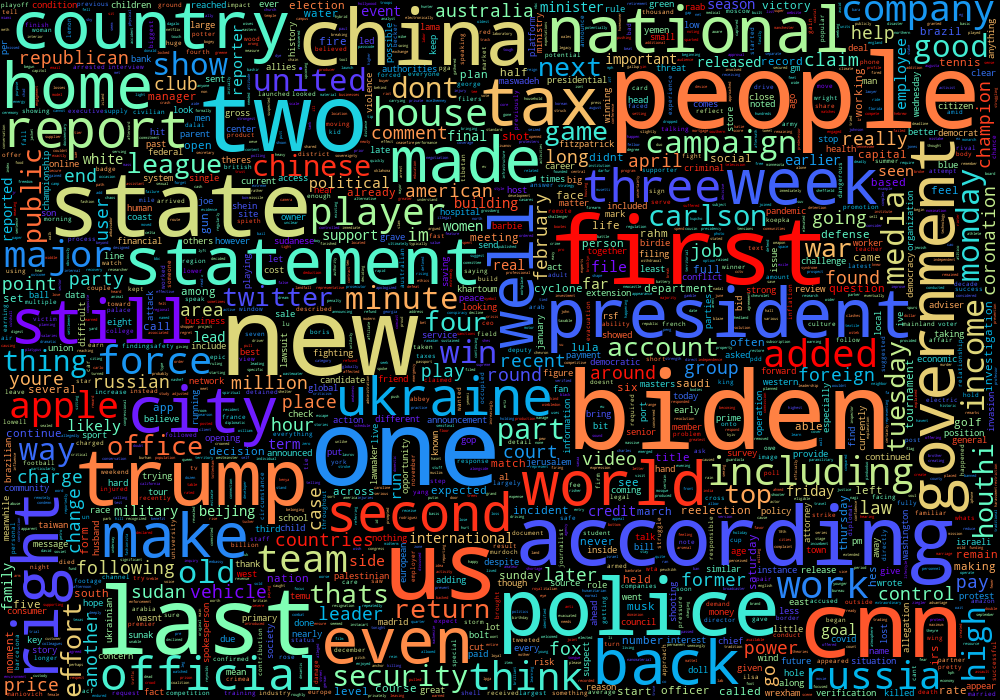

In [12]:
# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=700, max_font_size=110, background_color="black",colormap='rainbow', max_words=10000, contour_width=3, contour_color='red',collocations=False,stopwords=custom_stopwords)

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [13]:
from collections import Counter
from tqdm import trange

corpus = []
for i in trange(text.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += text['Content_list'][i]
len(corpus)

mostCommon = Counter(corpus).most_common(15)
mostCommon

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1185/1185 [00:00<00:00, 46128.90it/s]


[('people', 1797),
 ('news', 1769),
 ('us', 1688),
 ('one', 1574),
 ('new', 1476),
 ('fox', 1442),
 ('first', 1248),
 ('last', 1081),
 ('two', 1053),
 ('according', 1042),
 ('president', 950),
 ('biden', 936),
 ('state', 798),
 ('cnn', 733),
 ('even', 696)]

In [14]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

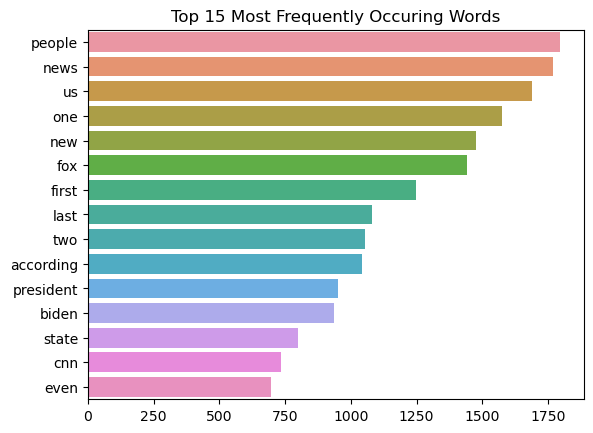

In [15]:
import seaborn as sns
sns.barplot(x=freq, y=words)
plt.title('Top 15 Most Frequently Occuring Words')
plt.show()

> A stat that shows most news is "he said, she said"! XD

## Most Frequently occuring N_grams

An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.

A Bi-gram means two words in a sequence. 'Very good' or 'Too great'
A Tri-gram means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.

For separating text into n-grams, we will use *CountVectorizer* from Sklearn.

<h2><b>BIGRAMS</b></h2>

In [16]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(text['Content'])


In [17]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "bi-gram"]

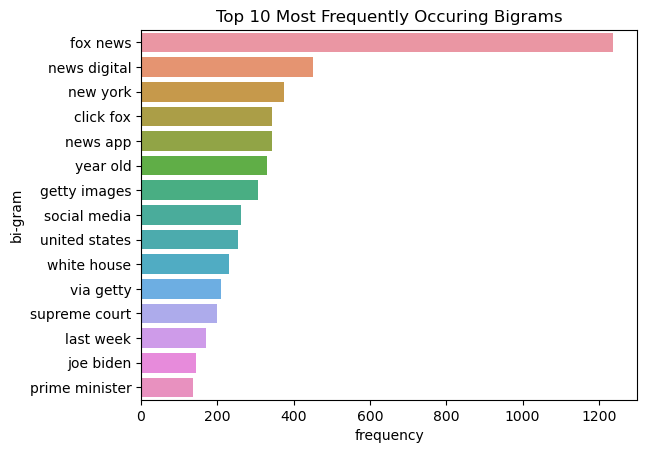

In [18]:
sns.barplot(x=ngram_freq['frequency'][:15], y=ngram_freq['bi-gram'][:15])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

<h2><b>TRIGRAMS</b></h2>

In [19]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(text['Content'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "Tri-gram"]

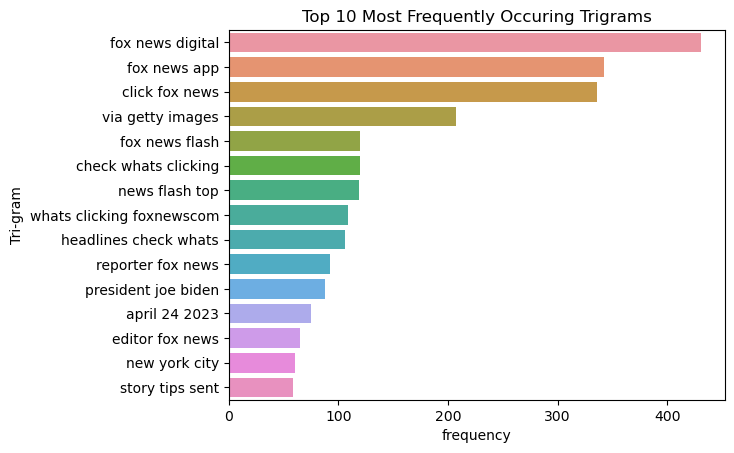

In [20]:
sns.barplot(x=ngram_freq['frequency'][:15], y=ngram_freq['Tri-gram'][:15])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

First, We’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the news headline length.

<AxesSubplot:>

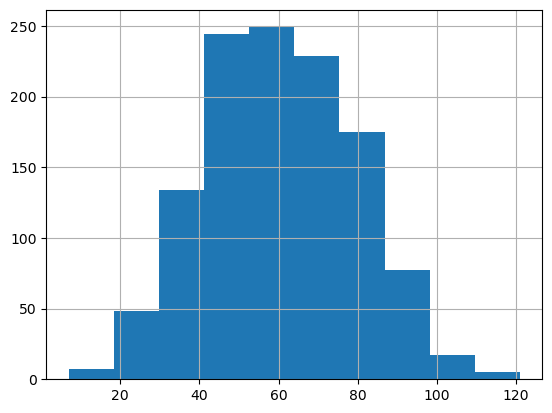

In [21]:
text['Title'].str.len().hist()

Each headline has about 100 characters!

<AxesSubplot:>

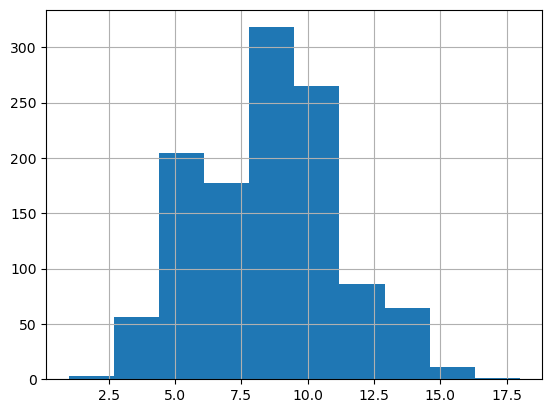

In [22]:
text['Title'].str.split().map(lambda x: len(x)).hist()

Each headline has about 8 words!

<h1><b>Latest News per day per country Visualization</b></h1>

In [23]:
import pycountry

In [24]:
# Create a set of all country names
countries = {country.name for country in pycountry.countries}
# Check for country names in the text
for text in text['Title']:
    for word in text.split():
        if word in countries:
            print (word)

<h2><b>Chloropleth Maps</h2><b>

In [25]:
import plotly.express as px
import pycountry
import pandas as pd


In [ ]:
import pycountry
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a set of all country names
countries = {country.name for country in pycountry.countries}
# Count the number of occurrences of each country in the 'Title' column
counts = df['Title'].apply(lambda x: pd.Series([word for word in x.split() if word in countries]))\
                    .stack()\
                    .reset_index(drop=True)\
                    .value_counts()\
                    .reset_index()\
                    .rename(columns={'index': 'country', 0: 'count'})
print(counts)
# Get the alpha-3 codes for each country
def get_alpha3(country_name):
    try:
        for country in pycountry.countries:
           return pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except:
        return None
counts['alpha_3'] = counts['country'].apply(get_alpha3)

# Read the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['alpha_3'] = world['iso_a3']
world['count'] = counts['count']

# Merge the world map with the counts DataFrame
merged = world.merge(counts[['alpha_3', 'country']], on='alpha_3', how='left')

# # Generate the chloropleth map
# fig, ax = plt.subplots(figsize=(12, 8))
# merged.plot(column='name', cmap='Blues', legend=False, ax=ax, edgecolor='grey', linewidth=0.5, k=5, figsize=(10, 6))
# ax.set_title('Country Counts')
# ax.set_axis_off()
# plt.show()
merged.to_csv('country.csv')
counts.to_csv('count.csv')

/var/folders/4w/gzwnglt575713rq2s0x__2_r0000gn/T/ipykernel_65743/3268699172.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  counts = df['Title'].apply(lambda x: pd.Series([word for word in x.split() if word in countries]))\


        country  count
0         Sudan     24
1         China     24
2       Ukraine     22
3         India     11
4     Australia      8
5        Mexico      4
6        Jordan      4
7        Israel      4
8         Japan      4
9         Kenya      3
10      Ireland      3
11  Afghanistan      3
12    Argentina      3
13       Brazil      3
14      Georgia      2
15        Yemen      2
16         Peru      2
17       Poland      2
18       Rwanda      2
19       Canada      1
20    Singapore      1
21      Germany      1
22      Finland      1
23        Italy      1
24        Egypt      1
25        Haiti      1
26      Lebanon      1
27      Hungary      1
28      Ecuador      1
29     Pakistan      1
30        Spain      1
31    Indonesia      1


<h2><b>More Detailed visualization using Chloropleth Maps</b></h2>

<h3>used bokeh library to do visualization of the news counts per country</h3>

In [ ]:
import pycountry
import pandas as pd
import geopandas as gpd
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, HoverTool
from bokeh.palettes import Blues,Plasma,Purples,Blues256
from bokeh.models import LinearColorMapper
from bokeh.palettes import Magma,Viridis,Inferno,Cividis,Spectral,Category10,Category20,Pastel2

# Create a set of all country names
countries = {country.name for country in pycountry.countries}
# print(countries)
# Count the number of occurrences of each country in the 'Title' column
counts = df['Title'].apply(lambda x: pd.Series([word for word in x.split() if word in countries]))\
                    .stack()\
                    .reset_index(drop=True)\
                    .value_counts()\
                    .reset_index()\
                    .rename(columns={'index': 'country', 0: 'count'})



# Get the alpha-3 codes for each country
def get_alpha3(country_name):
    if country_name == 'US' or country_name == 'USA' or country_name == 'America' or country_name=='United States':
        return pycountry.countries('U.S.')
    try:
        for country in pycountry.countries:
           return pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except:
        return None
counts['alpha_3'] = counts['country'].apply(get_alpha3)

# Read the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['alpha_3'] = world['iso_a3']

# Merge the world map with the counts DataFrame
merged = world.merge(counts[['alpha_3', 'country', 'count']], on='alpha_3', how='left')

# Convert merged DataFrame to GeoJSONDataSource
geosource = GeoJSONDataSource(geojson=merged.to_json())
low = max(counts['count'])
high = min(counts['count'])
# Define color palette
palette = Blues256[::-1]
# Instantiate the figure object
# p = figure(title='Country Counts', plot_height=600, plot_width=950, toolbar_location=None, tools=[])
p = figure(plot_height=840, plot_width=1500, toolbar_location=None, tools=[],background='white',
           background_fill_color='black')


# Add the polygons to the map
p.patches('xs', 'ys', source=geosource, fill_color={'field': 'count', 'transform': LinearColorMapper(palette=palette)}, line_color='white', line_width=0.5, fill_alpha=1)

# Add the hover tool
hover = HoverTool(tooltips=[('Country', '@name'), ('Count', '@count')], mode='mouse')
p.add_tools(hover)

# Set the map properties
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False
p.outline_line_color = None

# Show the map
show(p)